<a href="https://colab.research.google.com/github/mohammed1916/ml/blob/main/1_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Dataset Collection

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
from google.colab import userdata

api_token = {"username":"curiousmohammed","key":userdata.get('kaggle_key')}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d aariyan101/usa-housingcsv

  0% 0.00/363k [00:00<?, ?B/s]
100% 363k/363k [00:00<00:00, 102MB/s]


In [ ]:
import zipfile

zip_file_path = "./usa-housingcsv.zip"
extract_dir = "./extracted_files"

with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extract("USA_Housing.csv", extract_dir)

df = pd.read_csv(f"{extract_dir}/USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# Linear Regression

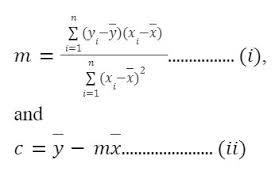

## Using Randomly generated data

In [ ]:
def linear_regression(X, y):
  x_mean = np.mean(X)
  y_mean = np.mean(y)

  num = 0
  den = 0
  for i in range(len(X)):
    num += (X[i] - x_mean) * (y[i] - y_mean)
    den += (X[i] - x_mean) ** 2

  slope = num / den
  intercept = y_mean - slope * x_mean

  return slope, intercept

X = np.random.rand(100)
y = 2 * X + 3 + np.random.randn(100)

slope, intercept = linear_regression(X, y)

print("Slope:", slope)
print("Intercept:", intercept)


Slope: 1.8283892294624016
Intercept: 3.0585018840539537


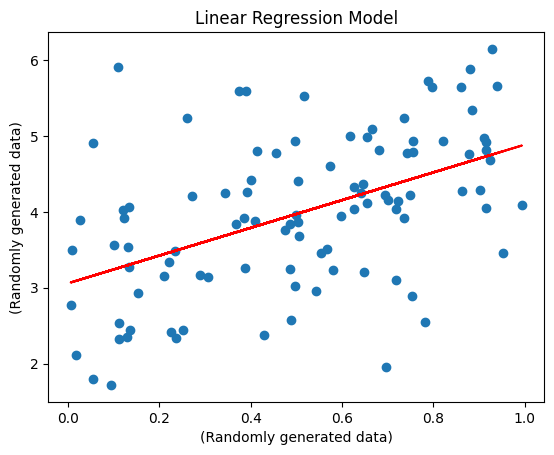

In [ ]:
predictions = slope * X + intercept

plt.scatter(X, y)
plt.plot(X, predictions, color='red')

plt.title("Linear Regression Model")
plt.xlabel("(Randomly generated data)")
plt.ylabel("(Randomly generated data)")

plt.show()


## Linear Regression on dataset without Libraries

Slope: [21.19548317]
Intercept: [-221579.47820592]


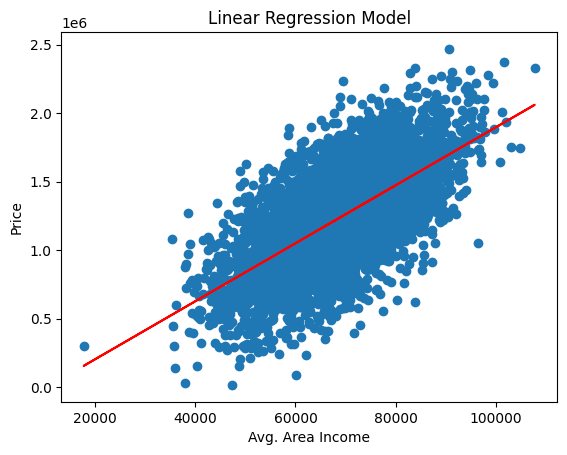

In [ ]:
import numpy as np

area_income = df["Avg. Area Income"].values.reshape(-1, 1)
price = df["Price"].values

slope, intercept = linear_regression(area_income, price)

print("Slope:", slope)
print("Intercept:", intercept)

predictions = slope * area_income + intercept

plt.scatter(area_income, price)
plt.plot(area_income, predictions, color='red')

plt.title("Linear Regression Model")
plt.xlabel("Avg. Area Income")
plt.ylabel("Price")

plt.show()


## Using Libraries

Slope: 21.19548317193168
Intercept: -221579.4782059181


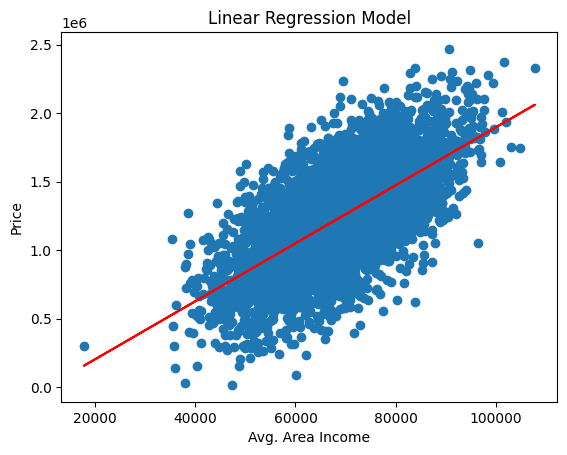

In [ ]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(df[["Avg. Area Income"]], df["Price"])

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

predictions = model.predict(df[["Avg. Area Income"]])

plt.scatter(df["Avg. Area Income"], df["Price"])
plt.plot(df["Avg. Area Income"], predictions, color='red')

plt.title("Linear Regression Model")
plt.xlabel("Avg. Area Income")
plt.ylabel("Price")

plt.show()


# Multiple Regression

https://www.sciencedirect.com/topics/mathematics/multiple-regression-equation#:~:text=With%20these%20variables%2C%20the%20usual,X%20%2B%20b2X2.&text=This%20is%20still%20considered%20a,individual%20terms%20are%20added%20together.

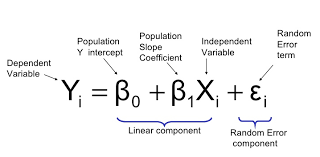

![Screenshot-2024-02-08-at-5-20-58-PM.png](https://i.postimg.cc/VNQ7dmRf/Screenshot-2024-02-08-at-5-20-58-PM.png)


![Coefficionts formula](https://i.postimg.cc/JhJDtSCK/Screenshot-2024-02-08-at-4-58-13-PM.png)

## Using Randomly Generated data

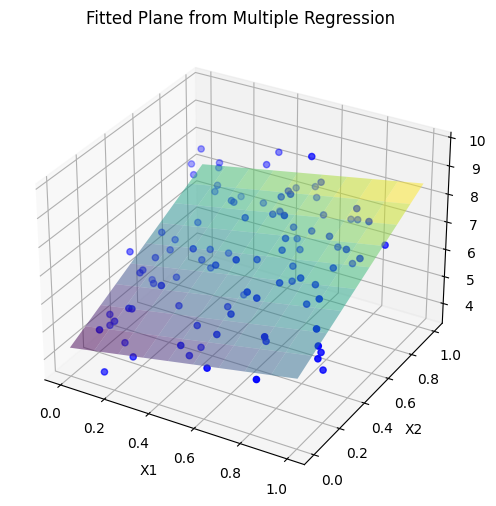

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)
X1 = np.random.rand(100)
X2 = np.random.rand(100)
y = 2 * X1 + 3 * X2 + 4 + np.random.randn(100)

X = np.column_stack((X1, X2))
X = np.column_stack((np.ones(len(X)), X))
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# plane equation: z = beta_0 + beta_1 * x1 + beta_2 * x2
x1_range = np.linspace(0, 1, 10)
x2_range = np.linspace(0, 1, 10)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
z_mesh = beta[0] + beta[1] * x1_mesh + beta[2] * x2_mesh

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1, X2, y, color='blue', label='Data Points')

ax.plot_surface(x1_mesh, x2_mesh, z_mesh, alpha=0.5, cmap='viridis', label='Fitted Plane')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Fitted Plane from Multiple Regression')

plt.show()


## Without Libraries (From Scratch)

In [ ]:
def multiple_regression(X, y):
    # Add a column of ones to the X matrix for the intercept term
    X = np.column_stack((np.ones(len(X)), X))

    # Calculate beta coefficients using the formula: beta = (X'X)^(-1)X'y
    beta = np.linalg.inv(X.T @ X) @ X.T @ y

    return beta

area_income = df["Avg. Area Income"].values.reshape(-1, 1)
avg_area_house_age = df["Avg. Area House Age"].values.reshape(-1, 1)
avg_area_number_of_rooms = df["Avg. Area Number of Rooms"].values.reshape(-1, 1)
price = df["Price"].values

X = np.concatenate((area_income, avg_area_house_age, avg_area_number_of_rooms), axis=1)

b = multiple_regression(X, price)
print("Beta Coefficients:", b)

Beta Coefficients: [-2.05694675e+06  2.13527346e+01  1.62803968e+05  1.21850656e+05]


In [ ]:
y_predicted = b[0] + b[1] * area_income + b[2] * avg_area_house_age + b[3] * avg_area_number_of_rooms
print(f'Predicted values:\n{y_predicted}')

Predicted values:
[[1420832.85533566]
 [1432679.33830885]
 [1243971.28765978]
 ...
 [1062544.94887079]
 [1164900.72433896]
 [1145105.00241085]]


In [ ]:
X.shape

(5000, 3)

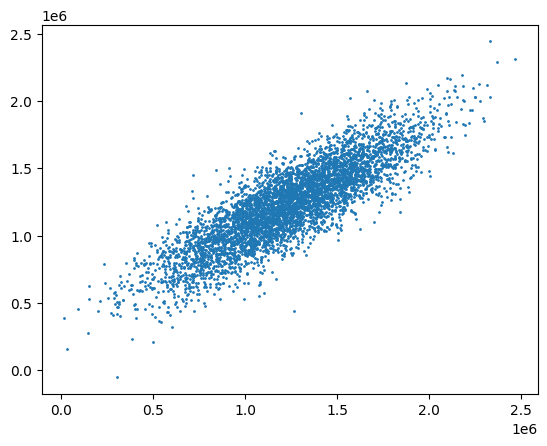

In [ ]:
plt.scatter(price, y_predicted, s=1 )
plt.show()

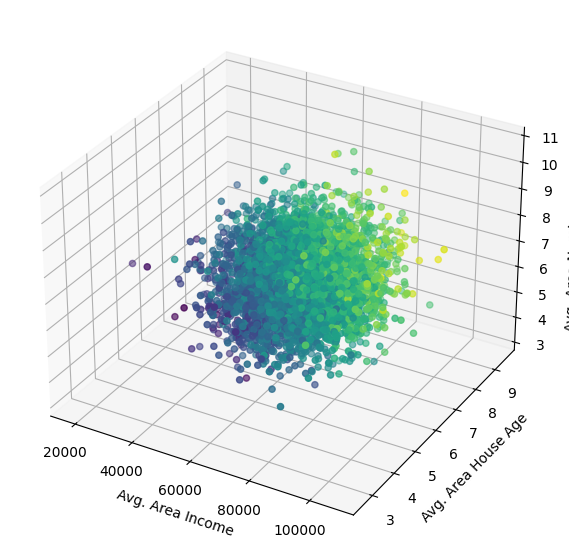

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(area_income, avg_area_house_age, avg_area_number_of_rooms, c=price, cmap='viridis')

ax.set_xlabel('Avg. Area Income')
ax.set_ylabel('Avg. Area House Age')
ax.set_zlabel('Avg. Area Number of Rooms')

plt.show()


In [ ]:
x_grid, y_grid = np.meshgrid(area_income, avg_area_house_age)

In [ ]:
x_grid.shape

(5000, 5000)

In [ ]:
y_predicted.shape

(5000, 1)

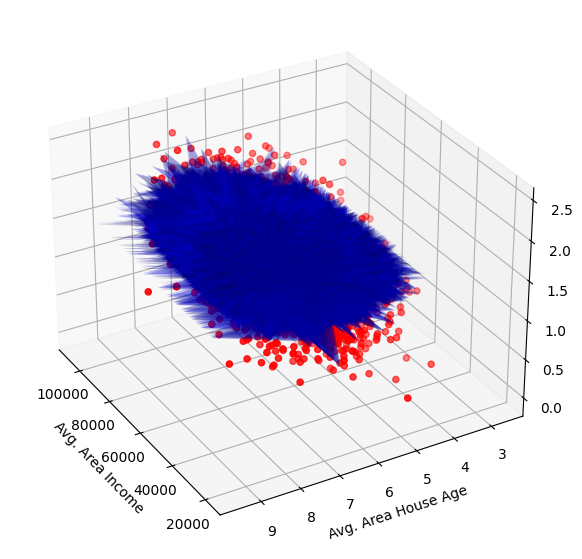

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(area_income, avg_area_house_age, price, c='r')

ax.plot_surface(x_grid, y_grid, y_predicted, color='blue', alpha=0.1)

ax.set_xlabel('Avg. Area Income')
ax.set_ylabel('Avg. Area House Age')
ax.set_zlabel('Prices')
ax.view_init(30, 150)
plt.show()

## Using Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import userdata
import json
import zipfile
from sklearn.linear_model import LinearRegression
%matplotlib inline

area_income = df["Avg. Area Income"].values.reshape(-1, 1)
avg_area_house_age = df["Avg. Area House Age"].values.reshape(-1, 1)
avg_area_number_of_rooms = df["Avg. Area Number of Rooms"].values.reshape(-1, 1)
price = df["Price"].values.reshape(-1, 1)

X = np.hstack((area_income, avg_area_house_age, avg_area_number_of_rooms))

model = LinearRegression()

model.fit(X, price)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

predictions = model.predict(X)


Coefficients: [[2.13527346e+01 1.62803968e+05 1.21850656e+05]]
Intercept: [-2056946.75134982]


In [ ]:
predictions.shape

(5000, 1)

In [ ]:
avg_area_house_age.shape

(5000, 1)

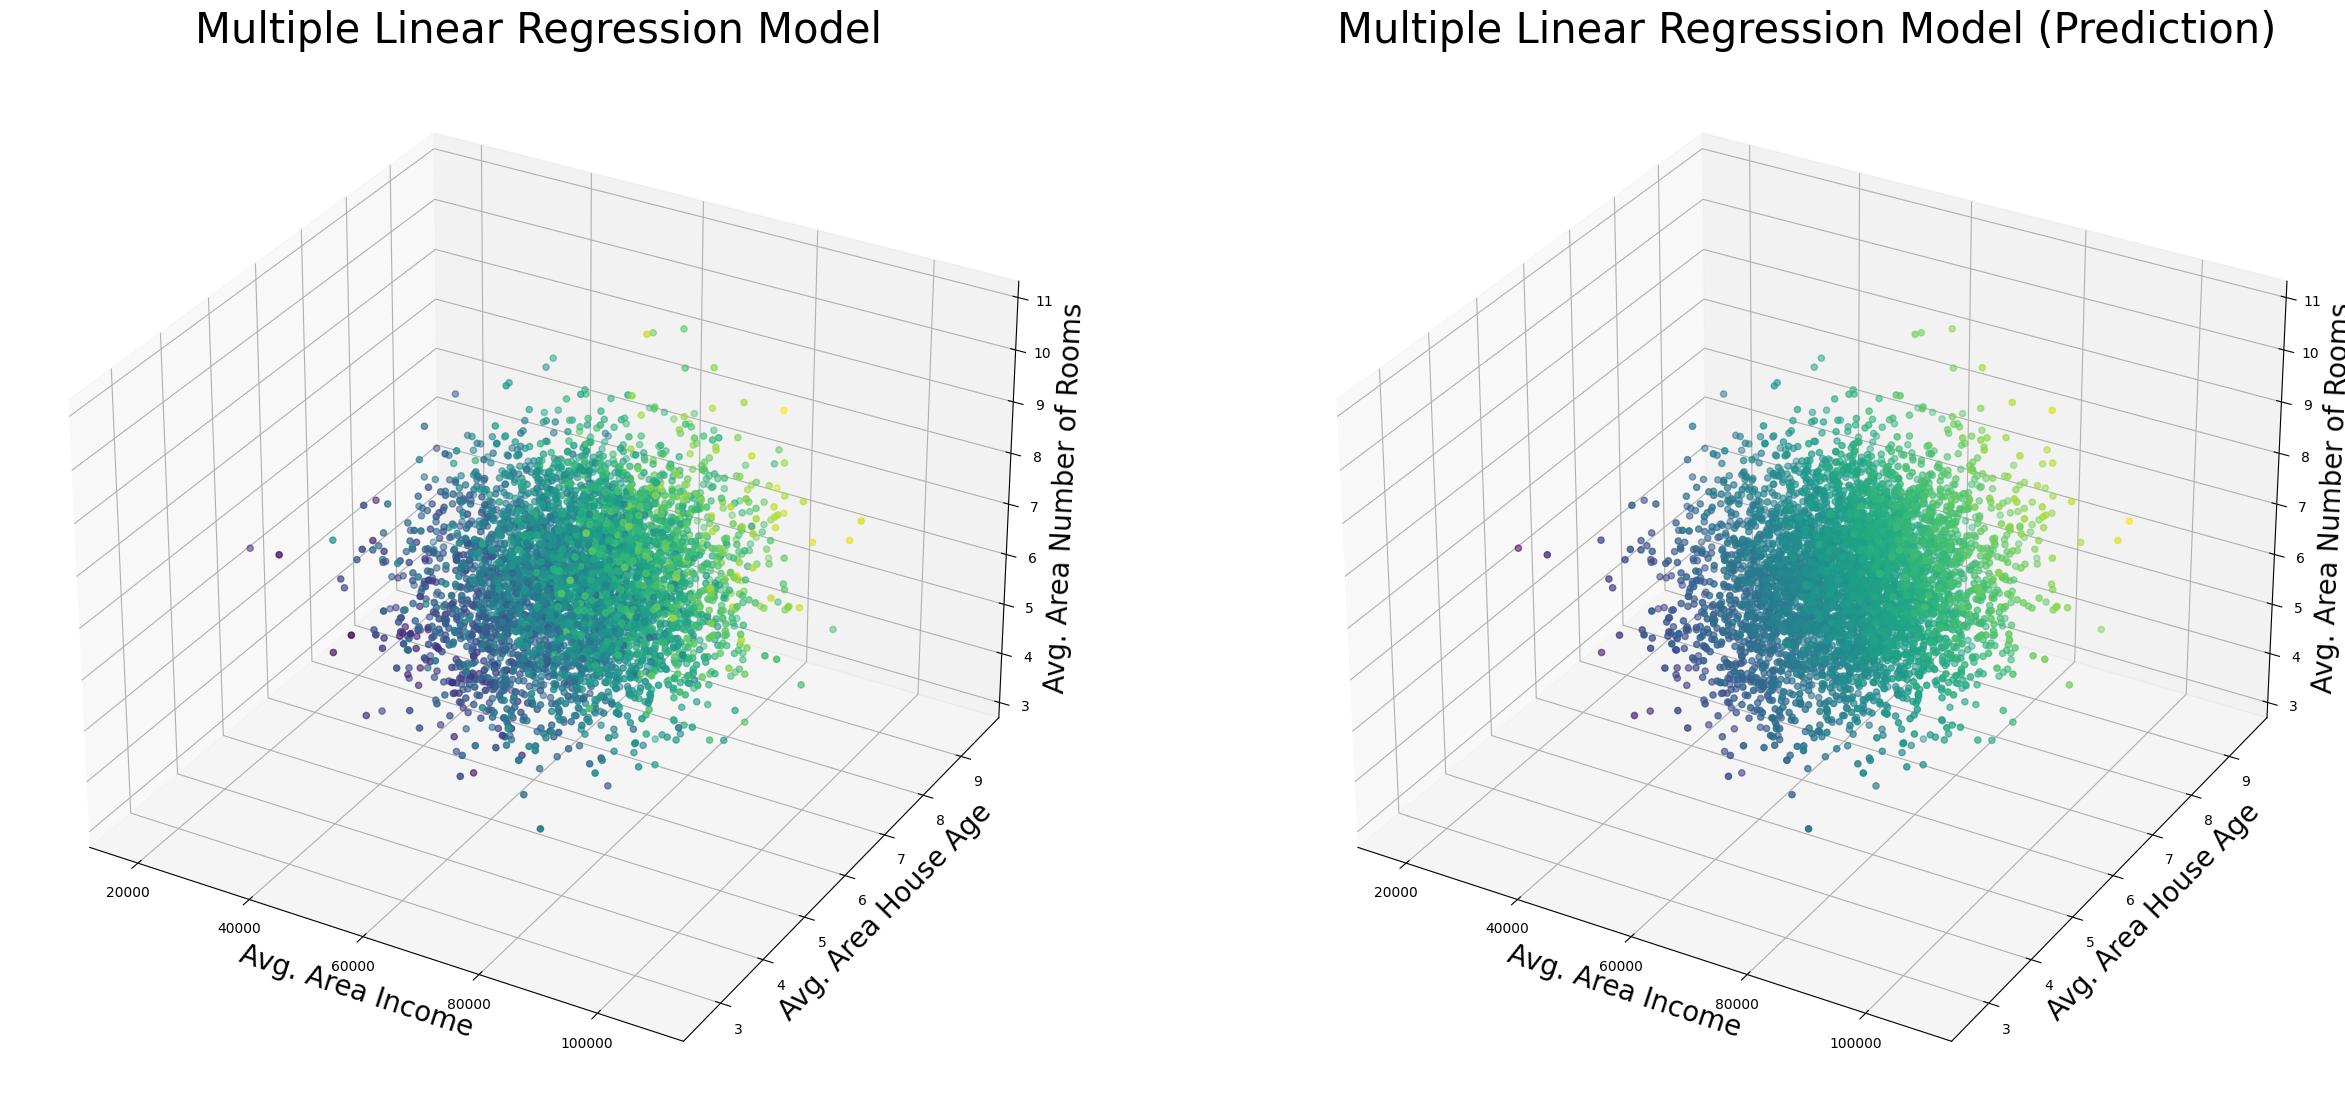

In [ ]:
fig = plt.figure(figsize=(30,25))
ax = fig.add_subplot(121, projection='3d')
ax_p = fig.add_subplot(122, projection='3d')
ax.scatter(
    area_income,
    avg_area_house_age,
    avg_area_number_of_rooms,
    c=price, cmap='viridis')
ax_p.scatter(
    area_income,
    avg_area_house_age,
    avg_area_number_of_rooms,
    c=predictions, cmap='viridis')

ax.set_xlabel('Avg. Area Income')
ax.set_ylabel('Avg. Area House Age')
ax.set_zlabel('Avg. Area Number of Rooms')
ax.set_title('Multiple Linear Regression Model')
ax_p.set_xlabel('Avg. Area Income')
ax_p.set_ylabel('Avg. Area House Age')
ax_p.set_zlabel('Avg. Area Number of Rooms')
ax_p.set_title('Multiple Linear Regression Model (Prediction)')

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.zaxis.label.set_size(20)
ax.title.set_size(30)
ax_p.xaxis.label.set_size(20)
ax_p.yaxis.label.set_size(20)
ax_p.zaxis.label.set_size(20)
ax_p.title.set_size(30)
plt.show()

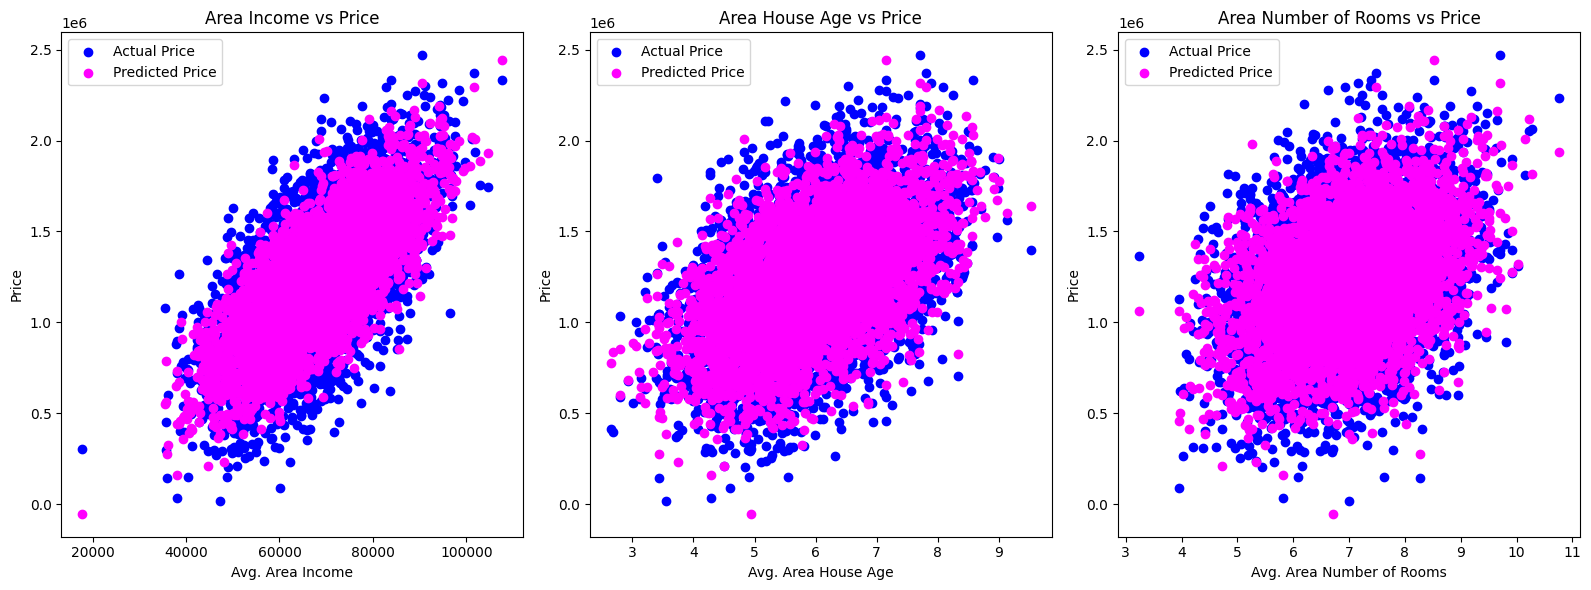

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axes[0].scatter(area_income, price, color='blue', label='Actual Price')
axes[0].scatter(area_income, predictions, color='magenta', label='Predicted Price' )
axes[0].set_xlabel('Avg. Area Income')
axes[0].set_ylabel('Price')
axes[0].set_title('Area Income vs Price')
axes[0].legend()

axes[1].scatter(avg_area_house_age, price, color='blue', label='Actual Price')
axes[1].scatter(avg_area_house_age, predictions, color='magenta', label='Predicted Price')
axes[1].set_xlabel('Avg. Area House Age')
axes[1].set_ylabel('Price')
axes[1].set_title('Area House Age vs Price')
axes[1].legend()

axes[2].scatter(avg_area_number_of_rooms, price, color='blue', label='Actual Price')
axes[2].scatter(avg_area_number_of_rooms, predictions, color='magenta', label='Predicted Price')
axes[2].set_xlabel('Avg. Area Number of Rooms')
axes[2].set_ylabel('Price')
axes[2].set_title('Area Number of Rooms vs Price')
axes[2].legend()

plt.tight_layout()
plt.show()


# Logistic Regression

## Using Libraries

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

Accuracy: 0.9333333333333333
Confusion matrix:
[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


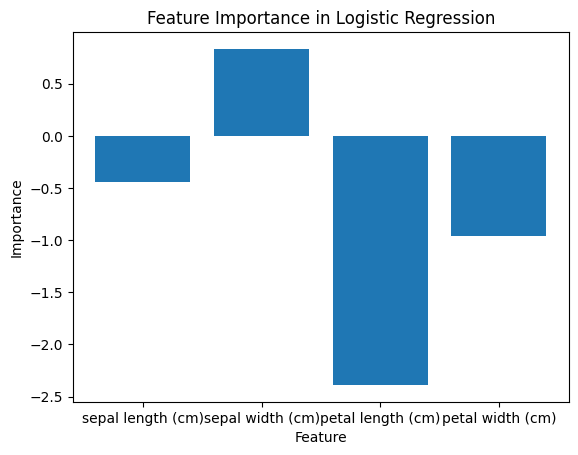

In [ ]:


model = LogisticRegression(max_iter=100000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= model.classes_)

if hasattr(model, 'coef_'):
  import matplotlib.pyplot as plt
  feature_names = iris.feature_names
  coefs = model.coef_[0]
  plt.bar(feature_names, coefs)
  plt.xlabel("Feature")
  plt.ylabel("Importance")
  plt.title("Feature Importance in Logistic Regression")
  plt.show()


## From Scratch

In [ ]:
import numpy as np
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X,y = make_classification()
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.1)

In [ ]:

def standardize(X_tr):
    for i in range(shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])
def F1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score
class LogidticRegression:
    def sigmoid(self,z):
        sig = 1/(1+exp(-z))
        return sig
    def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X
    def fit(self,X,y,alpha=0.001,iter=400):
        weights,X = self.initialize(X)
        def cost(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list
    def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis
standardize(X_tr)
standardize(X_te)
obj1 = LogidticRegression()
model= obj1.fit(X_tr,y_tr)
y_pred = obj1.predict(X_te)
y_train = obj1.predict(X_tr)
f1_score_tr = F1_score(y_tr,y_train)
f1_score_te = F1_score(y_te,y_pred)
print(f1_score_tr)
print(f1_score_te)

0.8723404255319148
0.888888888888889


### Comparison with library function

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
model = LogisticRegression().fit(X_tr,y_tr)
y_pred = model.predict(X_te)
print(f1_score(y_te,y_pred))

0.7692307692307693


# Polynomial Regression

## Using Random data

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def format_coefs(coefs):
    equation_list = [f"{coef}x^{i}" for i, coef in enumerate(coefs)]
    equation = "$" +  " + ".join(equation_list) + "$"

    replace_map = {"x^0": "", "x^1": "x", '+ -': '- '}
    for old, new in replace_map.items():
        equation = equation.replace(old, new)

    return equation

df = px.data.tips()
X = df.total_bill.values.reshape(-1, 1)
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

fig = px.scatter(df, x='total_bill', y='tip', opacity=0.65)
for degree in [1, 2, 3, 4]:
    poly = PolynomialFeatures(degree)
    poly.fit(X)
    X_poly = poly.transform(X)
    x_range_poly = poly.transform(x_range)

    model = LinearRegression(fit_intercept=False)
    model.fit(X_poly, df.tip)
    y_poly = model.predict(x_range_poly)

    equation = format_coefs(model.coef_.round(2))
    fig.add_traces(go.Scatter(x=x_range.squeeze(), y=y_poly, name=equation))

fig.show()

## Using Libraries

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2)

X_poly = poly_features.fit_transform(df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']])

model = LinearRegression()

model.fit(X_poly, df['Price'])
y_pred = model.predict(X_poly)

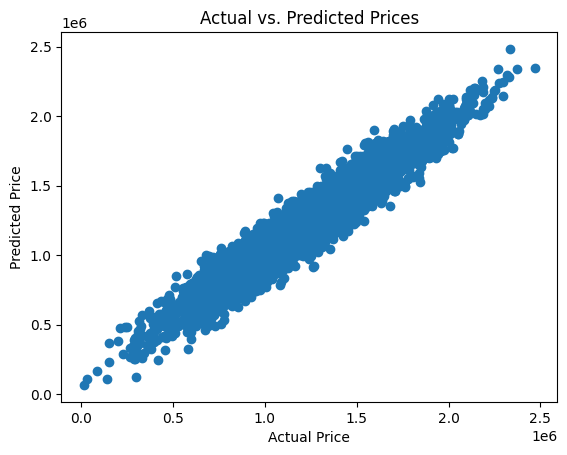

In [ ]:
plt.scatter(df['Price'], y_pred)

plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()


## Without Libraries (From scratch)

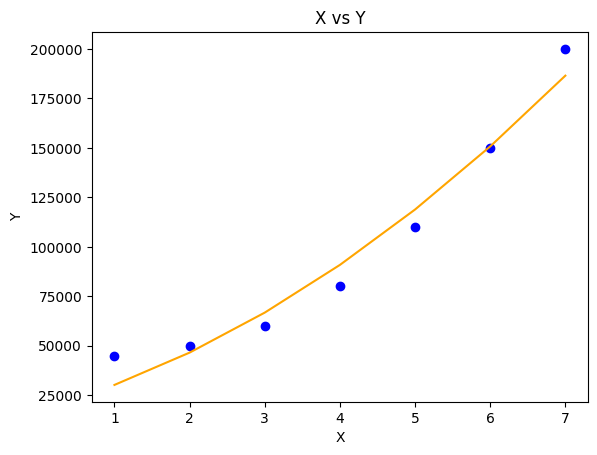

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

class PolynomailRegression() :
    def __init__( self, degree, learning_rate, iterations ) :
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations

    def transform( self, X ) :
        X_transform = np.ones( ( self.m, 1 ) )
        j = 0
        for j in range( self.degree + 1 ) :
            if j != 0 :
                x_pow = np.power( X, j )
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
        return X_transform

    def normalize( self, X ) :
        X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
        return X

    def fit( self, X, Y ) :
        self.X = X
        self.Y = Y
        self.m, self.n = self.X.shape

        self.W = np.zeros( self.degree + 1 )
        #  f( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        X_transform = self.transform( self.X )
        X_normalize = self.normalize( X_transform )
        for i in range( self.iterations ) :
            h = self.predict( self.X )
            error = h - self.Y
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error )
        return self

    def predict( self, X ) :
        #  f( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        X_transform = self.transform( X )
        X_normalize = self.normalize( X_transform )
        return np.dot( X_transform, self.W )

X = np.array( [ [1], [2], [3], [4], [5], [6], [7] ] )
Y = np.array( [ 45000, 50000, 60000, 80000, 110000, 150000, 200000 ] )

model = PolynomailRegression( degree = 2, learning_rate = 0.01, iterations = 500 )
model.fit( X, Y )
Y_pred = model.predict( X )

plt.scatter( X, Y, color = 'blue' )
plt.plot( X, Y_pred, color = 'orange' )
plt.title( 'X vs Y' )
plt.xlabel( 'X' )
plt.ylabel( 'Y' )
plt.show()